In [1]:
from __future__ import print_function
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional
from keras.datasets import imdb

Using TensorFlow backend.


### 设置参数

In [2]:
# 设置最大特征的数量，对于文本，就是处理的最大单词数量。若被设置为整数，则被限制为待处理数据集中最常见的max_features个单词
max_features=20000
# 设置每个文本序列的最大长度，当序列的长度小于maxlen时，将用0来进行填充，当序列的长度大于maxlen时，则进行截断
maxlen=100
# 设置训练的轮次
batch_size=32

### 加载数据

In [3]:
print("loading data ...")
# 加载数据
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
# 查看数据大小
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

loading data ...
25000 train sequences
25000 test sequences


### 数据处理

In [4]:
print('Pad sequences (samples x time)')
# 将文本序列处理成长度相同的序列
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


### 创建模型及训练

In [17]:
# 创建网络结构
model=Sequential()
model.add(Embedding(max_features,128,input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
# 编译模型
model.compile('adam','binary_crossentropy',metrics=['accuracy'])
# 训练模型
print('Train...')
train_history = model.fit(x_train, y_train,batch_size=batch_size,epochs=4,validation_data=[x_test, y_test])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 130s 5ms/step - loss: 0.4098 - acc: 0.8090 - val_loss: 0.3681 - val_acc: 0.8490
Epoch 2/4
25000/25000 [==============================] - 128s 5ms/step - loss: 0.2215 - acc: 0.9135 - val_loss: 0.3743 - val_acc: 0.8474
Epoch 3/4
25000/25000 [==============================] - 134s 5ms/step - loss: 0.1206 - acc: 0.9566 - val_loss: 0.4571 - val_acc: 0.8395
Epoch 4/4
25000/25000 [==============================] - 130s 5ms/step - loss: 0.0706 - acc: 0.9757 - val_loss: 0.5361 - val_acc: 0.8337


### 可视化结果

Populating the interactive namespace from numpy and matplotlib


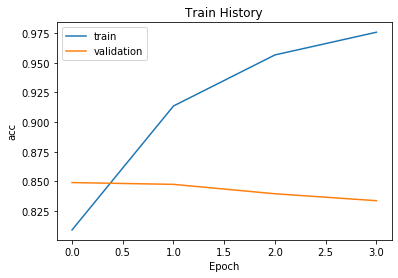

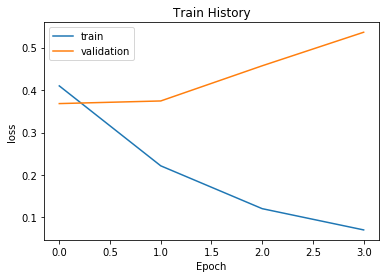

In [18]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    
show_train_history(train_history,'acc','val_acc')  #查看精度变化
show_train_history(train_history,'loss','val_loss') #查看损失变化